In [4]:
## MERGING TWO TABLES< INNER JOIN
import pandas as pd
import numpy as np
import os

In [5]:
table1=pd.DataFrame({"P_ID":(1,2,3,4,5,6,7,11),
                     "Gender":('m','f','m','f','f','m','m','f'),
                     "Height":(71,73,64,66,73,77,56,78),
                     "Weight":(175,225,66,78,210,155,166,180)})
table1

,P_ID,Gender,Height,Weight
0,1,m,71,175
1,2,f,73,225
2,3,m,64,66
3,4,f,66,78
4,5,f,73,210
5,6,m,77,155
6,7,m,56,166
7,11,f,78,180


In [7]:
table2=pd.DataFrame({"P_ID":(1,2,4,5,6,7,9,10),
                     "Sex":('m','f','m','f','f','m','m','f'),
                     "Visits":(1,2,4,2,2,2,3,1),
                     "Checkup":(0,1,0,1,0,1,1,0),
                     "followup":(1,1,1,0,1,1,0,0),
                     "illness":(0,0,2,7,1,1,0,0),
                     "Surgery":(0,0,0,2,0,0,0,0),
                     "ER":(0,1,0,0,0,1,0,1)})
table2


,P_ID,Sex,Visits,Checkup,followup,illness,Surgery,ER
0,1,m,1,0,1,0,0,0
1,2,f,2,1,1,0,0,1
2,4,m,4,0,1,2,0,0
3,5,f,2,1,0,7,2,0
4,6,f,2,0,1,1,0,0
5,7,m,2,1,1,1,0,1
6,9,m,3,1,0,0,0,0
7,10,f,1,0,0,0,0,1


In [8]:
combined12=pd.merge(table1,table2,how="right",on ="P_ID")
combined12

,P_ID,Gender,Height,Weight,Sex,Visits,Checkup,followup,illness,Surgery,ER
0,1,m,71.0,175.0,m,1,0,1,0,0,0
1,2,f,73.0,225.0,f,2,1,1,0,0,1
2,4,f,66.0,78.0,m,4,0,1,2,0,0
3,5,f,73.0,210.0,f,2,1,0,7,2,0
4,6,m,77.0,155.0,f,2,0,1,1,0,0
5,7,m,56.0,166.0,m,2,1,1,1,0,1
6,9,NaN,NaN,NaN,m,3,1,0,0,0,0
7,10,NaN,NaN,NaN,f,1,0,0,0,0,1


In [9]:
## Frequency distribution
import pandas as pd

my_tab=pd.crosstab(index=combined12["illness"],columns="count")
my_tab

col_0,count
illness,
0,4
1,2
2,1
7,1


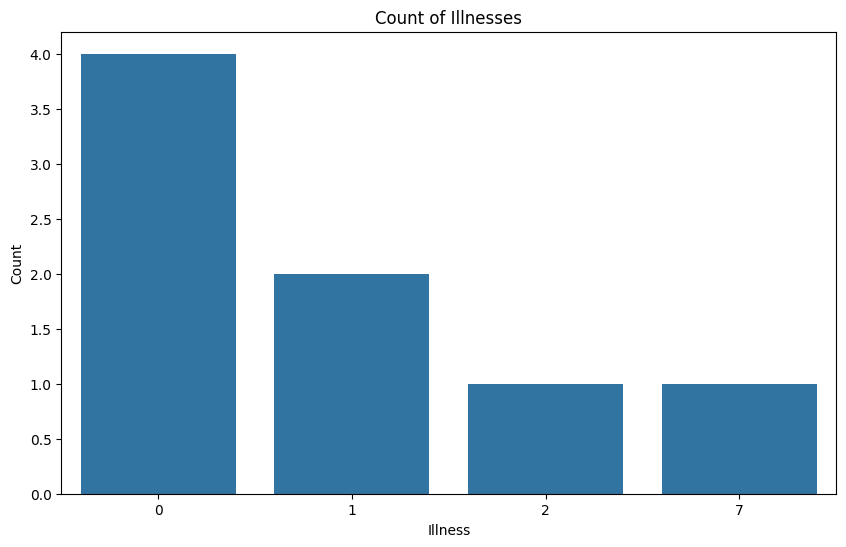

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=my_tab.index, y=my_tab['count'])
plt.title('Count of Illnesses')
plt.xlabel('Illness')
plt.ylabel('Count')
plt.show()


In [ ]:
# Calculate averages from table1
mean_height = table1['Height'].mean()
mean_weight = table1['Weight'].mean()

# Calculate averages from table2
mean_visits = table2['Visits'].mean()
mean_checkup = table2['Checkup'].mean()
mean_followup = table2['followup'].mean()
print(mean_height)
print(mean_weight)
print(mean_visits)
print(mean_checkup)
print(mean_followup)

69.75
156.875
2.125
0.5
0.625


In [ ]:
# calculating skewness and kurtosys
skewness_height = table1['Height'].skew()
skewness_weight = table1['Weight'].skew()
kurtosis_height = table1['Height'].kurtosis()
kurtosis_weight = table1['Weight'].kurtosis()

print("Skewness (Height):", skewness_height)
print("Skewness (Weight):", skewness_weight)
print("Kurtosis (Height):", kurtosis_height)
print("Kurtosis (Weight):", kurtosis_weight)

Skewness (Height): -0.8728571021487096
Skewness (Weight): -0.7699399217844539
Kurtosis (Height): 0.3091815213485596
Kurtosis (Weight): -0.5144852713773878


In [ ]:
## correlation coefficient
correlation_coefficient = table1['Height'].corr(table1['Weight'])
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.43655414722771385


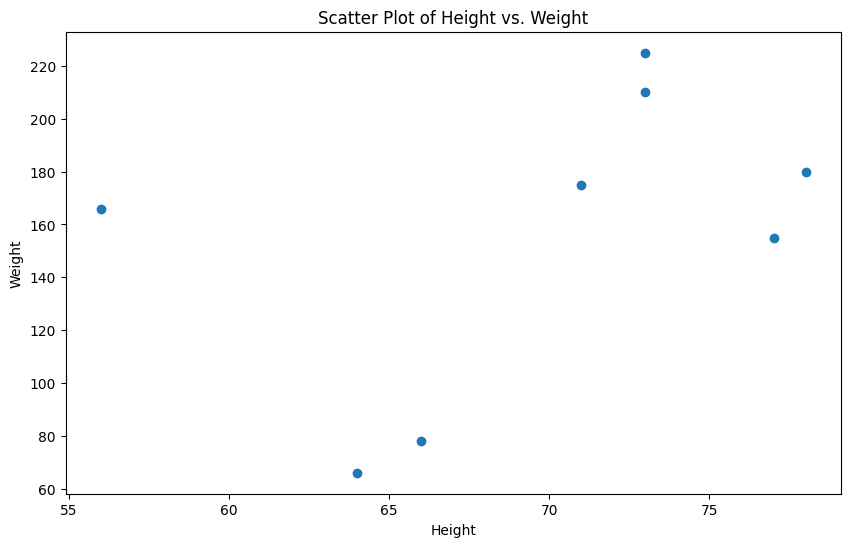

In [9]:
# scatter plot table1
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(table1['Height'], table1['Weight'])
plt.title('Scatter Plot of Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


Text(0, 0.5, 'Value')

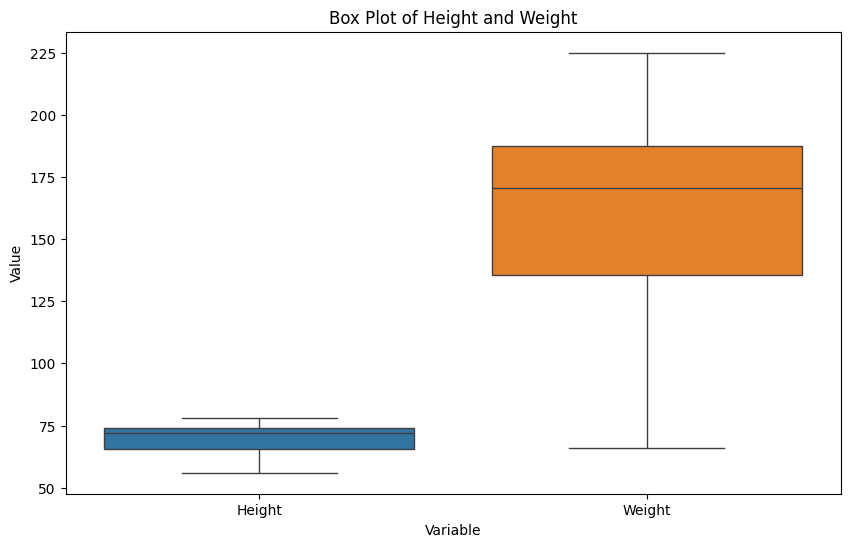

In [12]:
# box plot of the height and weight

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=[table1['Height'], table1['Weight']])
plt.title('Box Plot of Height and Weight')
plt.xlabel('Variable')
plt.ylabel('Value')

In [11]:
combined12.Gender.value_counts()## counting gender(categarocal) var from merge

,count
Gender,
m,3
f,3


In [13]:
# Cabin tab like cross tab
cabin_tab=pd.crosstab(index=combined12["Surgery"],columns="count")
cabin_tab

print(cabin_tab.sum(),'\n')#sum of the counts
print(cabin_tab.shape,'\n')# number of rws and cols
print(cabin_tab.size)#
cabin_tab.iloc[1:7]# number of rows and columns

col_0
count    8
dtype: int64 

(2, 1) 

2


col_0,count
Surgery,
2,1


In [14]:
##Propertion og total count
cabin_tab/cabin_tab.sum()
#We get prcentage of each row , also get % of miising if any missings

col_0,count
Surgery,
0,0.875
2,0.125


In [20]:
# reading a file from google drive as url, VVI:last part of the url replaced as  /export?format=csv
#also sheet needs to accessed to public from private
import pandas as pd
Url='https://docs.google.com/spreadsheets/d/1qc0XYRyh6BPXSx-fSdICGbCrj0QqHPvwQF4b3eyCRwI/export?format=csv'
df = pd.read_csv(Url)
df.head()

,Age,Weight
0,25,160
1,30,170
2,22,140
3,28,150
4,34,180


In [22]:
df.shape

(40, 2)

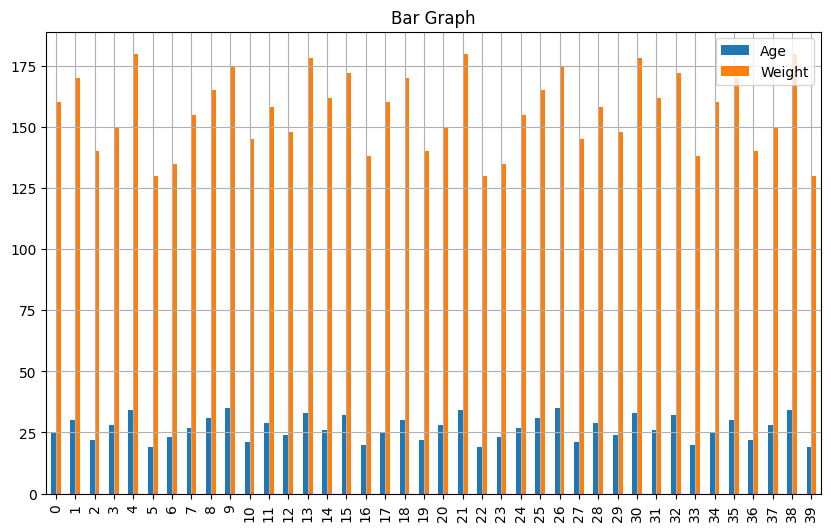

In [23]:
#let's plot the graph, you can play with grid and title
import matplotlib.pyplot as plt
df.plot(kind='bar',figsize=(10,6),grid=True)
plt.title('Bar Graph')
plt.show()


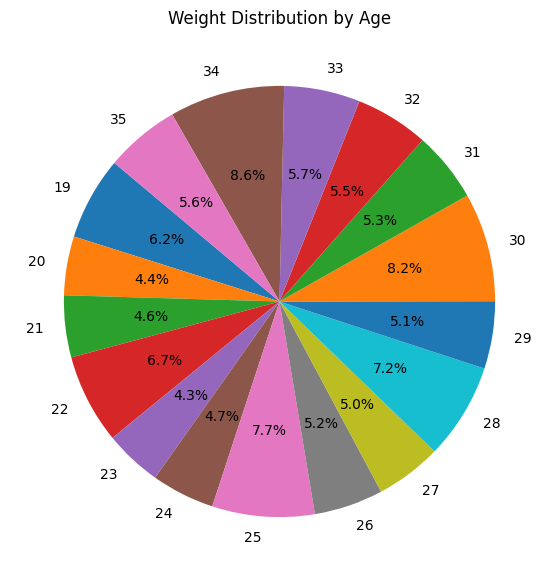

In [33]:
# Group the data by Age and sum the weights for each age
age_groups = df.groupby('Age')['Weight'].sum()

#Plot a pie chart
plt.figure(figsize=(10, 7))
plt.pie(age_groups, labels=age_groups.index, autopct='%1.1f%%', startangle=140)
plt.title('Weight Distribution by Age')
plt.show()


In [37]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     40 non-null     int64
 1   Weight  40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [38]:
df.columns# columns information

Index(['Age', 'Weight'], dtype='object')

In [39]:
df.describe()# statistical discription

,Age,Weight
count,40.00000,40.000000
mean,26.90000,156.300000
std,4.98099,15.697787
min,19.00000,130.000000
25%,22.75000,143.750000
50%,27.00000,158.000000
75%,31.00000,170.000000
max,35.00000,180.000000


In [40]:
df.isnull().sum()# null count

,0
Age,0
Weight,0


In [41]:
df.dtypes# data types

,0
Age,int64
Weight,int64


In [47]:
#filter the data and new df craetion
high_val=df['Weight']>70
low_val=df['Weight']<70
df_hv=df.loc[high_val]
df_lv=df.loc[low_val]
print(df_hv)
print(df_lv)


    Age  Weight
0    25     160
1    30     170
2    22     140
3    28     150
4    34     180
5    19     130
6    23     135
7    27     155
8    31     165
9    35     175
10   21     145
11   29     158
12   24     148
13   33     178
14   26     162
15   32     172
16   20     138
17   25     160
18   30     170
19   22     140
20   28     150
21   34     180
22   19     130
23   23     135
24   27     155
25   31     165
26   35     175
27   21     145
28   29     158
29   24     148
30   33     178
31   26     162
32   32     172
33   20     138
34   25     160
35   30     170
36   22     140
37   28     150
38   34     180
39   19     130
Empty DataFrame
Columns: [Age, Weight]
Index: []


`# New Section`::